# Prediction of female-headed households in RSA using Gradient Boosted Decision Trees (GBDT)

In [1]:
# import libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

RSEED = 42

/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# import data
df = pd.read_csv("Train.csv")

In [3]:
#define X and y values
X = df.drop(['target', 'ward', 'ADM4_PCODE'], axis=1)
y = df["target"]

In [4]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

## GBDT with all features

In [5]:
# train GDBT regressor
gbdt =  GradientBoostingRegressor(random_state=RSEED, learning_rate= 0.1, loss= 'huber', max_features='auto', n_estimators= 1000)
gbdt.fit(X, y)

gbdt.fit(X_train, y_train)

y_pred = gbdt.predict(X_test)

In [20]:
#evaluation metrics
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred)}")

RMSE: 3.2897349740211994
R2: 0.8918236078550048


In [ ]:
# plot residuals

## GBDT with selected features

selected features derive from the feature importance in a random forest model

In [26]:
# correlation
corr = df.corr()
corr_list = corr[abs(corr["target"]) > 0.5]
corr_list = corr_list.sort_values("target").index.values.tolist()
corr_list.remove("target")
corr_list

['pw_00',
 'psa_01',
 'car_00',
 'stv_00',
 'lln_00',
 'pg_03',
 'NL',
 'lan_00',
 'pg_00',
 'lln_01',
 'stv_01',
 'car_01',
 'psa_00']

In [3]:
#define X (with selected values) and y values
X = df[["psa_00", "car_01", "pw_00", "lln_01","pg_00","dw_10"]]
#X = df[corr_list]
y = df["target"]

In [4]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

In [5]:
# train GBDT regressor
gbdt = GradientBoostingRegressor(random_state=RSEED, learning_rate= 0.1, loss= 'huber', max_features='auto', n_estimators= 1000)
gbdt.fit(X, y)

gbdt.fit(X_train, y_train)

y_pred_sel = gbdt.predict(X_test)

In [6]:
#evaluation metrics
print(f"RMSE: {mean_squared_error(y_test, y_pred_sel, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred_sel)}")

RMSE: 4.1504136813859915
R2: 0.8278157429343247


In [9]:
gbdt.feature_importances_

array([0.49031481, 0.25641337, 0.14086166, 0.03684276, 0.06483533,
       0.01073207])

In [42]:
gbdt.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='target'>

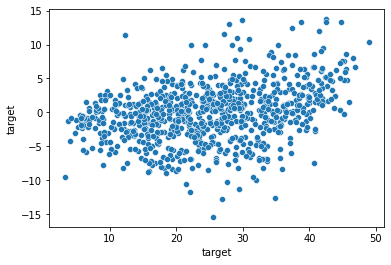

In [8]:
residuals = y_test - y_pred_sel
sns.scatterplot(y_test, residuals)

## Gridsearch for best hyperparameters

In [10]:
gbdt.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

'n_estimators': np.arange(100, 1000, 10)

In [16]:
# Defining parameter grid (as dictionary)
param_grid = { 'n_estimators': [100, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'learning_rate': [0.001, 0.001, 0.01, 0.1, 1],
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
}

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(GradientBoostingRegressor(random_state=RSEED,), param_grid, scoring='r2',
                  cv=5, n_jobs=-1)

# Fit gridsearch object to data
gs.fit(X_train, y_train)

/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.001, 0.01, 0.1, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 1000]},
             scoring='r2')

In [17]:
gs.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_features': 'auto',
 'n_estimators': 1000}